(1797, 64)


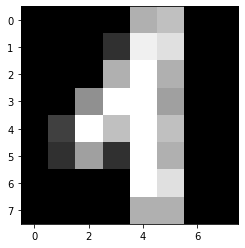

(364, 64)
(364,)
[[0.00000000e+00 1.00000000e+00 8.55628022e-03 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 ... 4.28842118e-03
  3.30615596e-03 2.33727121e-03]
 [5.56859099e-03 1.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  9.82265226e-04 4.20838056e-03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 9.82265226e-04
  0.00000000e+00 3.38333043e-03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.98424342e-03
  1.00197820e-03 0.00000000e+00]]
over


In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
print(X.shape)
plt.figure()
plt.imshow(np.reshape(X[200,:], (8,8)),cmap='gray') 
plt.show() 

#only retain the images representing  4  and  3 .
xx = []
yy = []
for i in range(n_samples):
    if y[i] == 3 or y[i] == 4:
        xx.append(X[i])
        yy.append(y[i])
xx = np.array(xx)
yy = np.array(yy)
print(xx.shape)
print(yy.shape)
N_samples,N_features = xx.shape

xx = xx - np.mean(xx,axis=0)
D = pairwise_distances(xx)
D_square = [[D[i][j]**2 for j in range(len(D[i]))] for i in range(len(D))]
D_square = np.array(D_square)
temp = np.identity(N_samples) - np.ones((N_samples,N_samples))/N_samples
S = np.dot(temp,D_square)
S = np.dot(S,temp)
S = -1/2 * S


#adjcency matrix A
K = 5
A = np.zeros((N_samples,N_samples))
for i in range(N_samples):
    index = np.argsort(D[i])
    for j in range(K):
        A[i][index[j]] = 1

#updated adjacency matrix new_A
new_A = np.ones((N_samples,N_samples))
norm_D = np.linalg.norm(D)
for i in range(N_samples):
    for j in range(N_samples):
        if A[i][j] == 1:
            new_A[i][j] = D[i][j] / norm_D
#Floyd Warshall algorithm
for k in range(N_samples):
    for i in range(N_samples):
        for j in range(N_samples):
            new_A[i][j] = min(new_A[i][j],new_A[i][k] + new_A[k][j])
print(new_A)   
print("over")

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[-30.87577432 -21.05846909] [-35.04142089  20.75423328]
(2, 364)
over


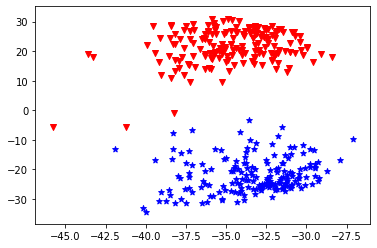

In [2]:


dist_1 = np.zeros((N_samples,1))
dist_2 = np.zeros((N_samples,1))
print(type(dist_1))
print(type(D_square))
for i in range(N_samples):
    dist_1[i] = new_A[i].sum() / N_samples
for j in range(N_samples):
    dist_2[j] = new_A.T[j].sum() / N_samples
dist = new_A.sum() / (N_samples**2)
B = np.zeros((N_samples,N_samples))
for i in range(N_samples):
    for j in range(N_samples):
        B[i][j] = - 1/2 * (D_square[i][j] - dist_1[i] - dist_2[j] + dist)
s,v,d = np.linalg.svd(B)
I = np.zeros((2,N_samples))
I[0][0] = 1
I[1][1] = 1
first = np.dot(I,np.sqrt(np.diag(v)))
z = np.dot(first,d)#low dimension representation of data
print(z.T[0],z.T[1])
print(z.shape)
for i in range(N_samples):
    if yy[i] == 3:
        plt.scatter(z[0][i],z[1][i],marker='*',c='b')
    else:
        plt.scatter(z[0][i],z[1][i],marker='v',c='r')
print("over")

In [55]:
#split the data
z = z.reshape(-1,2)
print(z.shape)
n_all = z.shape[0]
print("start")
print("start")
n_train = int(n_all * 0.9)
train_data = z[:n_train,:]
dev_data = z[n_train:,:]
print("n_all",n_all)
print(train_data.shape)
print(dev_data.shape)

#K-means
index1 = np.random.randint(n_train)
label1 = yy[index1]
index2 = np.random.randint(n_train)
label2 = yy[index2]
while label2 == label1:
    label2 = yy[index2]
    index2 += 1
print("label1",label1)
print("label2",label2)
iteration_time = 10
pred_label = np.zeros(n_train)
print(type(train_data[0]))
print("ok")

center_1 = train_data[index1]
center_2 = train_data[index2]
#compare distance of vecA and vecB
def distEclud(vecA, vecB):
    return np.sum(np.power(vecA - vecB, 2))
step = 0
steps = 10
while step < steps:
    print("step:",step,center_1,center_2)
    count_label1 = 0
    count_label2 = 0
    for j in range(n_train):#add label to data
        dis_c1 = distEclud(center_1,train_data[j])
        dis_c2 = distEclud(center_2,train_data[j])
        if dis_c1 < dis_c2:
            pred_label[j] = label1
            count_label1 += 1
        else:
            pred_label[j] = label2
            count_label2 += 1
    c1_sum_x = 0
    c1_sum_y = 0
    c2_sum_x = 0
    c2_sum_y = 0
    for j in range(n_train):#update centers
        if pred_label[j] == label1:
            c1_sum_x += train_data[j][0]
            c1_sum_y += train_data[j][1]
        else:
            c2_sum_x += train_data[j][0]
            c2_sum_y += train_data[j][1]
    center_1 = np.array([c1_sum_x/count_label1,c1_sum_y/count_label1])
    center_2 = np.array([c2_sum_x/count_label2,c2_sum_y/count_label2])
    step += 1


print("****************validation********************")
print(center_1,center_2)
print(train_data[0])
#validation
count_correct = 0
for i in range(n_all - n_train):
    if distEclud(dev_data[i],center_1) >= distEclud(dev_data[i],center_2) and yy[n_train + i] == label2:
        count_correct += 1
    elif distEclud(dev_data[i],center_1) < distEclud(dev_data[i],center_2) and yy[n_train + i] == label1:
        count_correct += 1
accuracy = count_correct / (n_all - n_train)
print("accuracy",accuracy)
print("over")

(364, 2)
start
start
n_all 364
(327, 2)
(37, 2)
label1 3
label2 4
<class 'numpy.ndarray'>
ok
step: 0 [-36.21238403 -30.97933622] [-33.99304588  20.4067935 ]
step: 1 [-33.54664922 -22.66476577] [-34.39466751  21.5396871 ]
step: 2 [-33.54669337 -22.54799217] [-34.39992155  21.69408248]
step: 3 [-33.54669337 -22.54799217] [-34.39992155  21.69408248]
step: 4 [-33.54669337 -22.54799217] [-34.39992155  21.69408248]
step: 5 [-33.54669337 -22.54799217] [-34.39992155  21.69408248]
step: 6 [-33.54669337 -22.54799217] [-34.39992155  21.69408248]
step: 7 [-33.54669337 -22.54799217] [-34.39992155  21.69408248]
step: 8 [-33.54669337 -22.54799217] [-34.39992155  21.69408248]
step: 9 [-33.54669337 -22.54799217] [-34.39992155  21.69408248]
****************validation********************
[-33.54669337 -22.54799217] [-34.39992155  21.69408248]
[-30.87577432 -21.05846909]
accuracy 0.9459459459459459
over
